In [1]:
# step 1: w1, w0을 임의의 값으로 설정하고 첫 비용 함수의 값을 계산
# step 2: w1을 w1 - (비용함수 w1 편미분), w0을 w0 - (비용함수 w0 편미분) 으로 업데이트한 후 비용 함수의 값을 계산
# step 3: 비용 함수의 값이 감소했으면 step2를 반복, 더 이상 비용 함수의 값이 감소하지 않으면 그 때의 w1, w0를 구하고 반복을 중지 

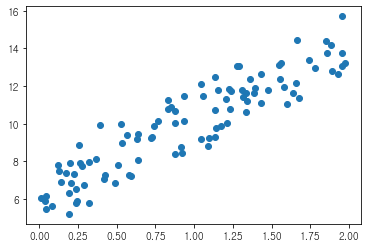

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

# y = 4X + 6 을 근사(w1=4, w0=6)

X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)

plt.scatter(X, y)


In [19]:
# 비용 함수 
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred)) / N
  return cost

In [39]:
# w1 과 w0 를 업데이트할 w1_update, w0_update 반환

def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N = len(y)
  
  # w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화 
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  
  # 예측 배열 계산하고 예측과 실제 값의 차이 계산 
  y_pred = np.dot(X, w1.T) + w0
  diff = y-y_pred
  
  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
  w0_factors = np.ones((N, 1))
  
  # w1과 w0를 업데이트할 w1_update와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
  
  return w1_update, w0_update

In [38]:
# 경사 하강 방식으로 반복적 수행 
# w1, w0를 업데이트하는 함수 생성

def gradient_descent_steps(X, y, iters=1000):
  
  #w0와 w1을 모두 0으로 초기화 
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  
  # 인자로 주어진 iters 만큼 반복적으로 get_weight_update()호출 w1, w0 업데이트 수행 
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update
    
  return w1, w0 

In [47]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1: {0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print("Gradient Descent Total Cost:{0:.4f}".format(get_cost(y, y_pred)))

w1: 4.022 w0:6.162
Gradient Descent Total Cost:0.9935


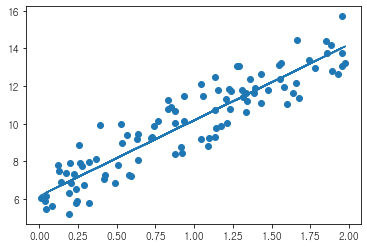

In [48]:
plt.scatter(X, y)
plt.plot(X, y_pred)

In [53]:
# (미니 배치) 확률적 경사 하강법

def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
  
  #w0와 w1을 모두 0으로 초기화 
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  
  pred_cost = 100000
  iter_index = 0
  
  for ind in range(iters):
    np.random.seed(ind)
    
    # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장 
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update
    
  return w1, w0 

In [54]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1: {0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print("Stochastic Gradient Descent Total Cost:{0:.4f}".format(get_cost(y, y_pred)))

w1: 4.028 w0:6.156
Stochastic Gradient Descent Total Cost:0.9937
